<a href="https://colab.research.google.com/github/EdmarBortoletto/Ciencias-de-Dados/blob/main/Aprendizado_de_maquina_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-Processamento


In [ ]:
import pandas as pd #carregar arquivos csv
import numpy as np
import seaborn as sns #visualização de graficos
import matplotlib.pyplot as plt
import plotly.express as px #gerar graficos dinamicos

In [ ]:
#exploração dos dados

data = pd.read_csv('breast_cancer.csv')
data

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [ ]:
data.describe()

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.isnull().sum()


sample_id                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [ ]:
del data['sample_id']


In [ ]:
data['diagnosis'].value_counts()

benign       357
malignant    212
Name: diagnosis, dtype: int64

In [ ]:
data['diagnosis'] = data['diagnosis'].replace({'B': 1, 'M': 0})

In [ ]:
data['diagnosis'].value_counts()

benign       357
malignant    212
Name: diagnosis, dtype: int64

In [ ]:
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']

In [ ]:
data.to_pickle("breast_cancer.pkl")

## KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [ ]:
with open('breast_cancer.pkl','rb') as f:
    df = pickle.load(f)


In [ ]:
print(df.head())


   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_treinamento.shape)
print(y_treinamento.shape)


(398, 30)
(398,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_treinamento,y_treinamento)

previsoes = knn.predict(X_teste)

In [ ]:
previsoes
y_teste

204       benign
70     malignant
131    malignant
431       benign
540       benign
         ...    
69        benign
542       benign
176       benign
501    malignant
247       benign
Name: diagnosis, Length: 171, dtype: object

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


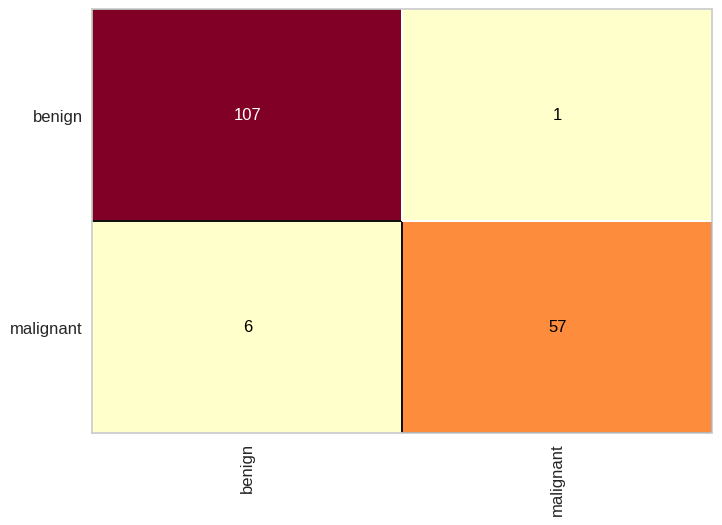

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste,y_teste)
plt.show()

In [ ]:
accuracy_score(y_teste,previsoes)

0.9590643274853801

In [ ]:

print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

      benign       0.95      0.99      0.97       108
   malignant       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## SVM

In [ ]:
from sklearn.svm import SVC
import pickle

In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_treinamento, y_treinamento)

SVC(kernel='linear', random_state=1)

In [ ]:
previsoes = svm.predict(X_teste)
previsoes
print(y_teste)

204       benign
70     malignant
131    malignant
431       benign
540       benign
         ...    
69        benign
542       benign
176       benign
501    malignant
247       benign
Name: diagnosis, Length: 171, dtype: object


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_teste,previsoes))
print(classification_report(y_teste,previsoes))

0.9649122807017544
              precision    recall  f1-score   support

      benign       0.96      0.98      0.97       108
   malignant       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9649122807017544

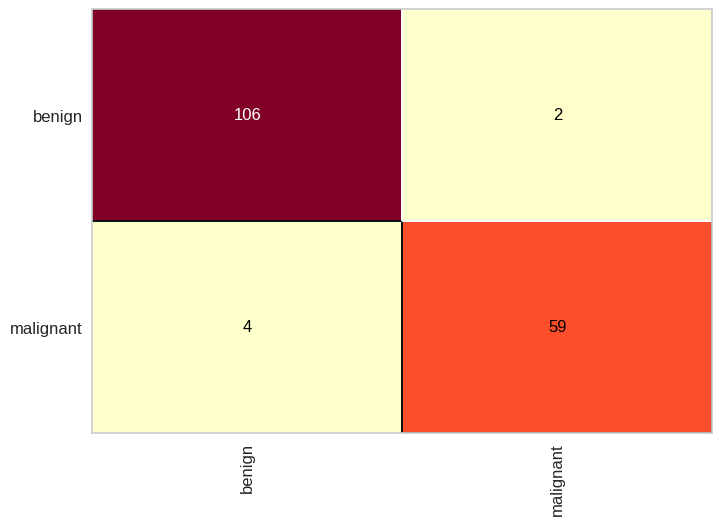

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

## Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report
import pickle
import matplotlib.pyplot as plt

In [ ]:
print(X_treinamento.shape, y_treinamento.shape)
print(X_teste.shape, y_teste.shape)

(398, 30) (398,)
(171, 30) (171,)


In [ ]:
naive = GaussianNB()
naive.fit(X_treinamento,y_treinamento)
previsoes = naive.predict(X_teste)
print(previsoes)
print(y_teste)
print(accuracy_score(y_teste,previsoes))


['benign' 'malignant' 'malignant' 'benign' 'benign' 'malignant'
 'malignant' 'malignant' 'benign' 'benign' 'benign' 'malignant' 'benign'
 'malignant' 'benign' 'malignant' 'benign' 'benign' 'benign' 'malignant'
 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'malignant' 'benign' 'malignant' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'malignant'
 'malignant' 'benign' 'benign' 'benign' 'malignant' 'malignant' 'benign'
 'benign' 'malignant' 'malignant' 'benign' 'malignant' 'benign' 'benign'
 'benign' 'benign' 'benign' 'benign' 'malignant' 'benign' 'benign'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'malignant' 'ben

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


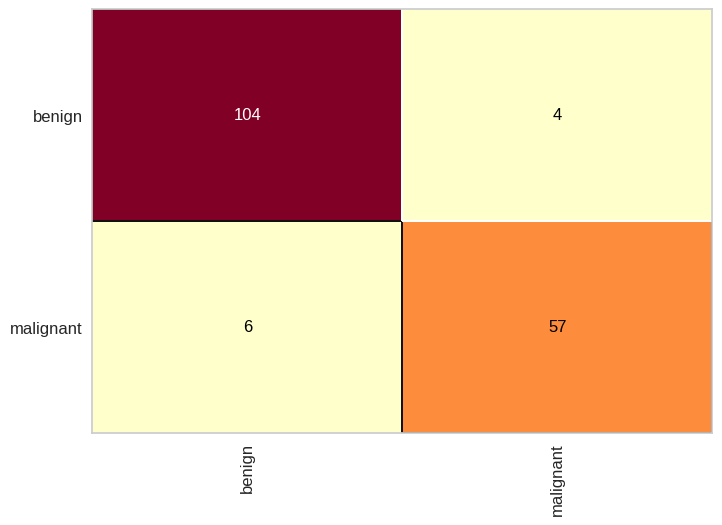

In [ ]:
cm = ConfusionMatrix(naive)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste,y_teste)
plt.show()

In [ ]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

      benign       0.95      0.96      0.95       108
   malignant       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## Arvore de decisão


In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [ ]:
print(X_treinamento.shape, y_treinamento.shape)

(398, 30) (398,)


In [ ]:
print(X_teste.shape,y_teste.shape)

(171, 30) (171,)


In [ ]:
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
arvore.fit(X_treinamento,y_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsores = arvore.predict(X_teste)
previsores
print('Y Teste')
print(y_teste)

Y Teste
204       benign
70     malignant
131    malignant
431       benign
540       benign
         ...    
69        benign
542       benign
176       benign
501    malignant
247       benign
Name: diagnosis, Length: 171, dtype: object


In [ ]:
accuracy_score(y_teste, previsores)

0.9590643274853801

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9590643274853801

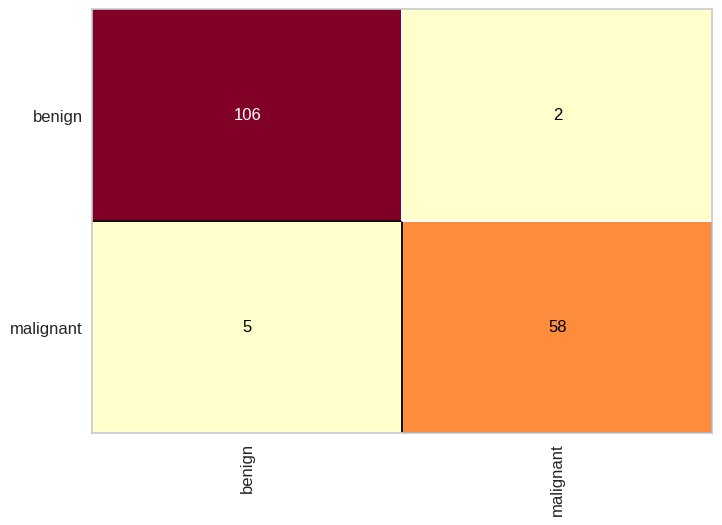

In [ ]:
cm = ConfusionMatrix(arvore)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste,y_teste)

In [ ]:
print(classification_report(y_teste,previsores))

              precision    recall  f1-score   support

      benign       0.95      0.98      0.97       108
   malignant       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## Random Forest


In [ ]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [ ]:
print(X_treinamento.shape, y_treinamento.shape)

(398, 30) (398,)


In [ ]:
print(X_teste.shape,y_teste.shape)

(171, 30) (171,)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state=0)
random_forest.fit(X_treinamento,y_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest.predict(X_teste)
print(previsoes)
print(y_teste)

['benign' 'malignant' 'malignant' 'benign' 'benign' 'malignant'
 'malignant' 'malignant' 'malignant' 'benign' 'benign' 'malignant'
 'benign' 'malignant' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'malignant' 'benign'
 'benign' 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'benign' 'benign'
 'malignant' 'malignant' 'benign' 'benign' 'benign' 'malignant'
 'malignant' 'benign' 'benign' 'malignant' 'malignant' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malignant' '

In [ ]:
print(accuracy_score(y_teste,previsoes))
print(classification_report(y_teste,previsoes))

0.9707602339181286
              precision    recall  f1-score   support

      benign       0.96      0.99      0.98       108
   malignant       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



0.9707602339181286


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


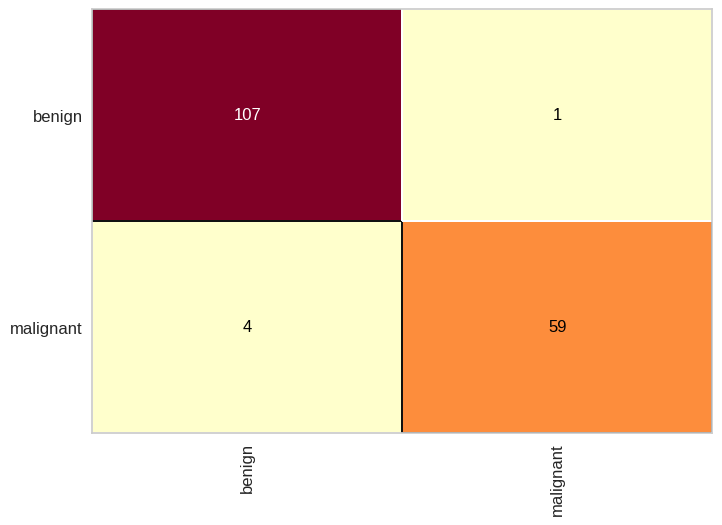

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_treinamento,y_treinamento)
print(cm.score(X_teste, y_teste))

## Acuracias
    KNN = 0.9590643274853801
    SVM = 0.9649122807017544
    Naive Bayes = 0.9415204678362573
    Arvore de Decisão = 0.9590643274853801
    Random Forest = 0.9707602339181286